In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#import autoreload  (for debugging external subroutines)
%load_ext autoreload
%autoreload 2

# subroutines needed, we also need kepcart.py
from orbsubs import *  
from outils import *
from scipy.signal import savgol_filter    
import sys
plt.rcParams.update({'font.size': 14})


### Binary simulation output plotting

In [3]:
# plot some stuff
def mkplot(tarr,aaarr,eearr,iiarr,lnarr,ararr,maarr,om1,om2,\
        obliquity_deg1,obliquity_deg2,meanmotion,lib_angle,froot,dn,ofilename):
    # dn is to plot every other point
    nvpanels = 5
    f,axarr =  plt.subplots(nvpanels,1, dpi=150, figsize=(5,6), sharex=True)
    plt.autoscale(enable=True, axis='x', tight=True)
    plt.subplots_adjust(left=0.2, right=0.99, top=0.99, bottom=0.10, \
        wspace=0.22, hspace=0.0)
    
    Porb_init = 2*np.pi/meanmotion[0]
    tarr /= Porb_init
    
    ###########################
    il = 0;   # top
    smax = np.amax([np.amax(om1),np.amax(om2)])
    smin = np.amin([np.amin(om1),np.amin(om2)])
    axarr[il].set_ylim(smin,smax)
    axarr[il].plot(tarr[::dn],om1[::dn],'.',color='black',\
                   ms=2,label='prim')
    axarr[il].plot(tarr[::dn],om2[::dn],'.',color='blue',\
                   ms=2,label='sec')
    mm_smo = meanmotion
    if (len(tarr)>100):
        mm_smo = savgol_filter(meanmotion, 21, 2, mode='nearest')
    axarr[il].plot(tarr[::dn],mm_smo[::dn]*1,':',color='brown',lw=2,alpha=0.5)
    for j in range(2,7):
        axarr[il].plot(tarr[::dn],mm_smo[::dn]*j,':',color='brown',lw=1,alpha=0.5)
    for j in range(0,7):
        axarr[il].plot(tarr[::dn],mm_smo[::dn]*(j+0.5),':',color='purple',lw=1,alpha=0.5)
        
    axarr[il].set_ylabel('spin')
    axarr[il].legend(borderpad=0.1,labelspacing=0.1,handlelength=0.5,handletextpad=0.1,\
                    markerscale=2)
    
    ##########################
    il = 1;
    axarr[il].plot(tarr[::dn],obliquity_deg1[::dn],'.',color='red',\
                   ms=2,label='prim')
    axarr[il].plot(tarr[::dn],obliquity_deg2[::dn],'.',color='darkorange',\
                   ms=2,label='sec')
    axarr[il].set_ylabel('obliquity \n (deg)')
    axarr[il].legend(borderpad=0.1,labelspacing=0.1,handlelength=0.5,handletextpad=0.1,\
                    markerscale=2)
    
    
    ##########################
    il = 2;
    lib_a = lib_angle%np.pi
    ii = (lib_a > np.pi/2)
    lib_a[ii] -= np.pi
    lib_a *= 180.0/np.pi
    axarr[il].plot(tarr[::dn],lib_a[::dn],'.',color='purple',ms=2)
    axarr[il].set_ylabel('libration \n angle (deg)')
    #axarr[il].set_ylim(bottom=2.5,top=5)
    
    ##########################
    il = 3;
    amax = max(aaarr)
    amin = min(aaarr)
    if (amax > 5):
        axarr[il].set_ylim(max(amin,0),5)
    axarr[il].plot(tarr[::dn],aaarr[::dn],'.',color='green',ms=2)
    axarr[il].set_ylabel('semi-major \n axis ' + r'$a_B/R_p$')
    #axarr[il].set_ylim(bottom=2.5,top=5)
    
    ########################## 
    il = 4;
    emax = max(eearr)
    emin = min(eearr)
    if (emax > 1):
        axarr[il].set_ylim(0,1)
    axarr[il].plot(tarr[::dn],eearr[::dn],'.',color='dodgerblue',ms=2)
    axarr[il].set_ylabel('eccentricity')
    il = nvpanels-1;
    axarr[il].set_xlabel('time (orbital periods)')
    if (len(ofilename)>3):
        plt.savefig(ofilename)

In [4]:
# global information needed!
simdir = "../bin3/" # where simulation output files are found
   
m1 = 1.0;  # masses of the two bodies!  Globals!
m2 = 0.01;  #  lower mass secondary
GM = m1+m2 # G=1


../bin3/a1_ext_1.txt
../bin3/a1_ext_2.txt


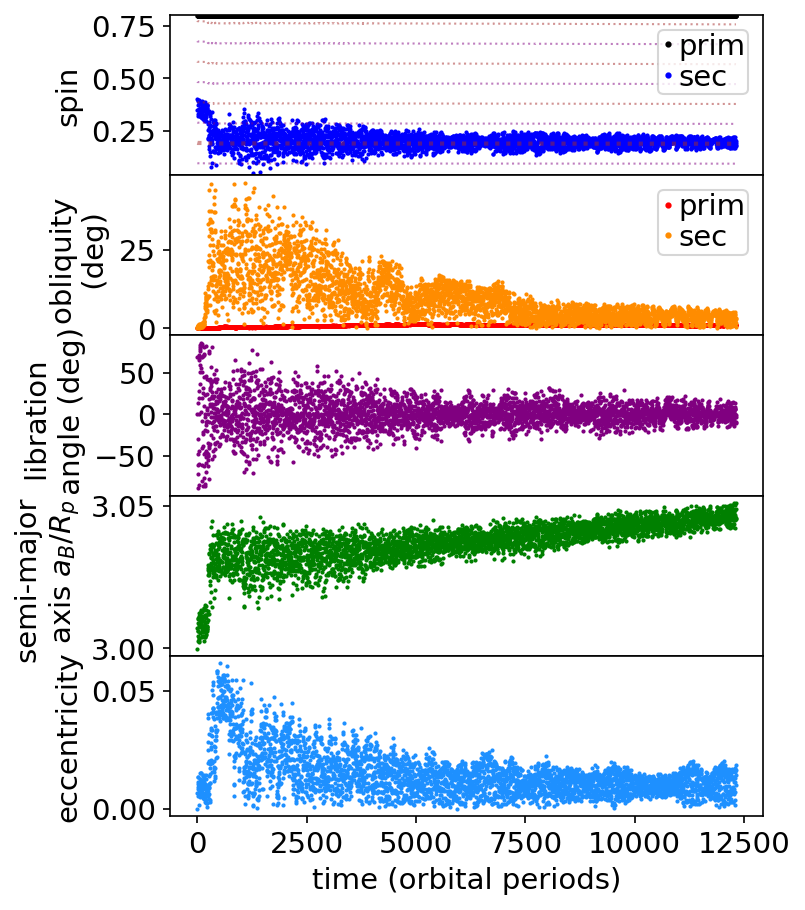

In [5]:
# read in orbital elements, spins for both resolved bodies
froot = 'a1'  # tides alone trying to let secondary tidally lock
tarr,aaarr,eearr,iiarr,lnarr,ararr,maarr,om1,om2,\
        obliquity_deg1,obliquity_deg2,meanmotion,lib_angle = read_two_bodies(simdir,froot,GM)


# make a plot!
ofilename='a1.png'
mkplot(tarr,aaarr,eearr,iiarr,lnarr,ararr,maarr,om1,om2,\
        obliquity_deg1,obliquity_deg2,meanmotion,lib_angle,froot,10,ofilename)

In [6]:
# convenient simulation as lets us measure tidal drift from the beginning of the simulation

../bin3/a1_ext_1.txt
../bin3/a1_ext_2.txt


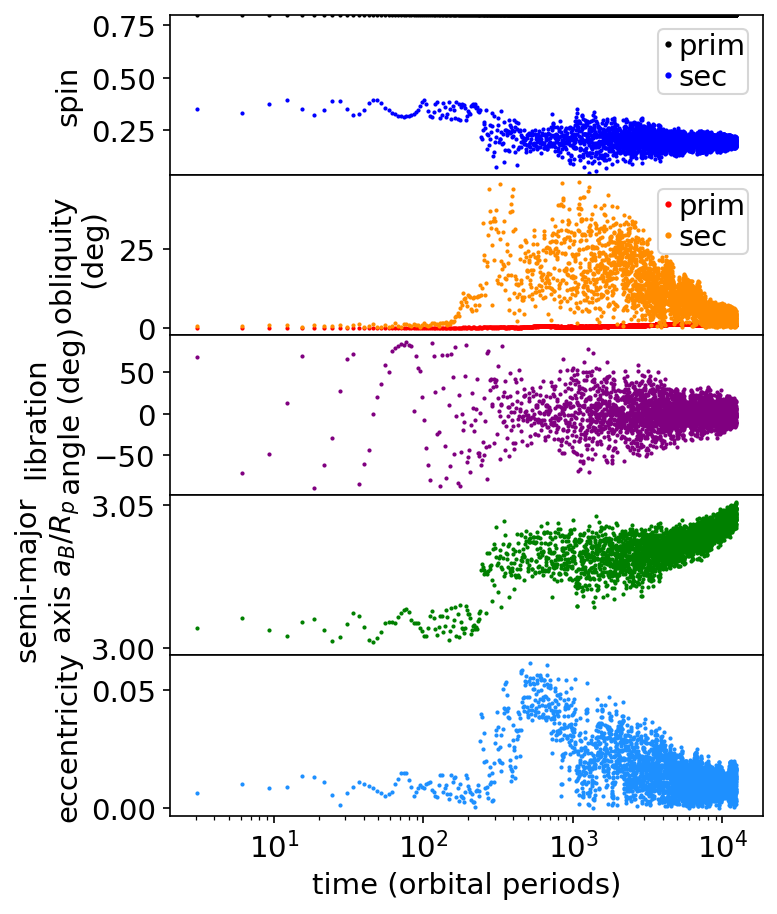

In [32]:
# plot some stuff
def mkplotlog(tarr,aaarr,eearr,iiarr,lnarr,ararr,maarr,om1,om2,\
        obliquity_deg1,obliquity_deg2,meanmotion,lib_angle,froot,dn,ofilename):
    # dn is to plot every other point
    nvpanels = 5
    f,axarr =  plt.subplots(nvpanels,1, dpi=150, figsize=(5,6), sharex=True)
    
#     plt.autoscale(enable=True, axis='x', tight=True)
    plt.subplots_adjust(left=0.2, right=0.99, top=0.99, bottom=0.10, \
        wspace=0.22, hspace=0.0)
    
    Porb_init = 2*np.pi/meanmotion[0]
    tarr /= Porb_init
    
    ###########################
    il = 0;   # top
    smax = np.amax([np.amax(om1),np.amax(om2)])
    smin = np.amin([np.amin(om1),np.amin(om2)])
    axarr[il].set_ylim(smin,smax)
    axarr[il].semilogx(tarr[::dn],om1[::dn],'.',color='black',\
                   ms=2,label='prim')
    axarr[il].semilogx(tarr[::dn],om2[::dn],'.',color='blue',\
                   ms=2,label='sec')
    mm_smo = meanmotion
    if (len(tarr)>100):
        mm_smo = savgol_filter(meanmotion, 21, 2, mode='nearest')
    axarr[il].plot(tarr[::dn],mm_smo[::dn]*1,':',color='brown',lw=2,alpha=0.5)
    for j in range(2,7):
        axarr[il].semilogx(tarr[::dn],mm_smo[::dn]*j,':',color='brown',lw=1,alpha=0.5)
    for j in range(0,7):
        axarr[il].semilogx(tarr[::dn],mm_smo[::dn]*(j+0.5),':',color='purple',lw=1,alpha=0.5)
        
    axarr[il].set_ylabel('spin')
    axarr[il].legend(borderpad=0.1,labelspacing=0.1,handlelength=0.5,handletextpad=0.1,\
                    markerscale=2)
    
    ##########################
    il = 1;
    axarr[il].semilogx(tarr[::dn],obliquity_deg1[::dn],'.',color='red',\
                   ms=2,label='prim')
    axarr[il].semilogx(tarr[::dn],obliquity_deg2[::dn],'.',color='darkorange',\
                   ms=2,label='sec')
    axarr[il].set_ylabel('obliquity \n (deg)')
    axarr[il].legend(borderpad=0.1,labelspacing=0.1,handlelength=0.5,handletextpad=0.1,\
                    markerscale=2)
    
    
    ##########################
    il = 2;
    lib_a = lib_angle%np.pi
    ii = (lib_a > np.pi/2)
    lib_a[ii] -= np.pi
    lib_a *= 180.0/np.pi
    axarr[il].semilogx(tarr[::dn],lib_a[::dn],'.',color='purple',ms=2)
    axarr[il].set_ylabel('libration \n angle (deg)')
    #axarr[il].set_ylim(bottom=2.5,top=5)
    
    ##########################
    il = 3;
    amax = max(aaarr)
    amin = min(aaarr)
    if (amax > 5):
        axarr[il].set_ylim(max(amin,0),5)
    axarr[il].semilogx(tarr[::dn],aaarr[::dn],'.',color='green',ms=2)
    axarr[il].set_ylabel('semi-major \n axis ' + r'$a_B/R_p$')
    #axarr[il].set_ylim(bottom=2.5,top=5)
    
    ########################## 
    il = 4;
    emax = max(eearr)
    emin = min(eearr)
    if (emax > 1):
        axarr[il].set_ylim(0,1)
    axarr[il].semilogx(tarr[::dn],eearr[::dn],'.',color='dodgerblue',ms=2)
    axarr[il].set_ylabel('eccentricity')
    il = nvpanels-1;
    axarr[il].set_xlabel('time (orbital periods)')
    if (len(ofilename)>3):
        plt.savefig(ofilename)
        
        
# read in orbital elements, spins for both resolved bodies
froot = 'a1'  # tides alone trying to let secondary tidally lock
tarr,aaarr,eearr,iiarr,lnarr,ararr,maarr,om1,om2,\
        obliquity_deg1,obliquity_deg2,meanmotion,lib_angle = read_two_bodies(simdir,froot,GM)


# make a plot!
ofilename='a1.png'
mkplotlog(tarr,aaarr,eearr,iiarr,lnarr,ararr,maarr,om1,om2,\
        obliquity_deg1,obliquity_deg2,meanmotion,lib_angle,froot,10,ofilename)

In [8]:
# from a1_run.txt
I1_p,I2_p,I3_p = 0.480784, 0.449625, 0.440806
I1_s,I2_s,I3_s = 0.000316, 0.000276, 0.000208

$A = \frac{M}{5} (b^2 + c^2) $

$B = \frac{M}{5} (a^2 + c^2) $

$C = \frac{M}{5} (a^2 + b^2) = \frac{M}{5} a^2(1 + \frac{b}{a} )^2)) $

$A<B<C$

$A+B+C = \frac{2M}{5}(a^2 + b^2 + c^2) $ 

$V = \frac{4}{3} \pi abc = \frac{4}{3} \pi a^3 \frac{b}{a} \frac{c}{a}  = \frac{4}{3} \pi R^3$ 

If $R=1$ then 
$a = \left[ \frac{b}{a} \frac{c}{a} \right]^{-\frac{1}{3}} $

$ A + B - C = \frac{2}{5} Mc^2$

$ A + C - B = \frac{2}{5} Mb^2$

$ -A + B+ C = \frac{2}{5} Ma^2$


In [9]:
a_p = np.sqrt( (5.0/2.0)*(I1_p + I2_p - I3_p) )
c_p = np.sqrt( (5.0/2.0)*(I2_p + I3_p - I1_p) )
b_p = np.sqrt( (5.0/2.0)*(I3_p + I1_p - I2_p) )
print('a_p,b_p,c_p = {:.3f} {:.3f} {:.3f}'.format(a_p,b_p,c_p))
print('b_p/a_p = {:.3f}, c_p/a_p = {:.3f}'.format(b_p/a_p, c_p/a_p))  # real axis ratios of primary

a_p,b_p,c_p = 1.106 1.086 1.012
b_p/a_p = 0.982, c_p/a_p = 0.915


In [10]:
a_s = np.sqrt( (5.0/2.0)*(I1_s + I2_s - I3_s) )
c_s = np.sqrt( (5.0/2.0)*(I2_s + I3_s - I1_s) )
b_s = np.sqrt( (5.0/2.0)*(I3_s + I1_s - I2_s) )
print('a_s,b_s,c_s = {:.3f} {:.3f} {:.3f}'.format(a_s,b_s,c_s))
print('b_s/a_s = {:.3f}, c_s/a_s = {:.3f}'.format(b_s/a_s, c_s/a_s))  # real axis ratios of primary

a_s,b_s,c_s = 0.031 0.025 0.020
b_s/a_s = 0.804, c_s/a_s = 0.661


# Using Savitzky-Golay filter
### Preliminary testing -- can delete later

../bin3/a1_ext_1.txt
../bin3/a1_ext_2.txt


../bin3/a1_ext_1.txt
../bin3/a1_ext_2.txt
Spin Values: Original = -0.0018t+ -1.7098: SMO = -0.0022t + -1.6668
Obliquity Values: Original = nant+ nan: SMO = -0.0002t + 2.9948
Spin/Obliquity slope: 13.756314925186594


/Users/anthonylabarca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in log


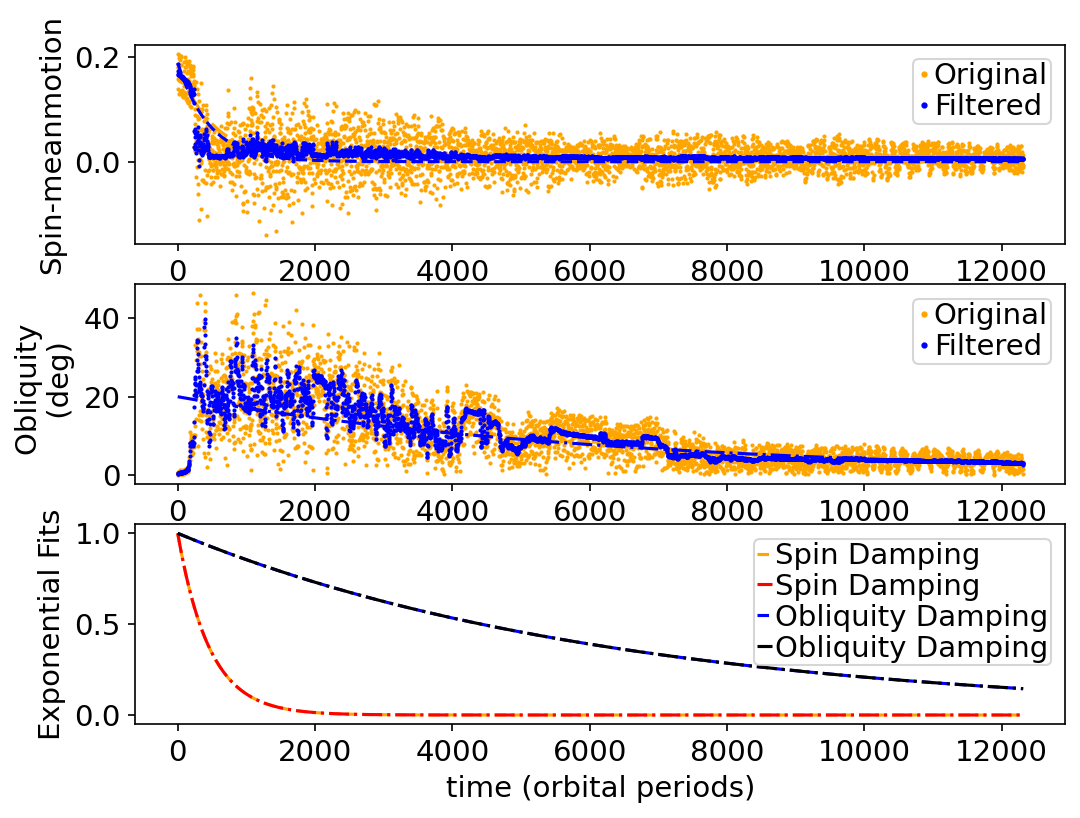

In [130]:
# plot some stuff
def mkplotdual_a(tarr,aaarr,eearr,iiarr,lnarr,ararr,maarr,om1,om2,\
        obliquity_deg1,obliquity_deg2,meanmotion,lib_angle,froot,dn,ofilename):
    # dn is to plot every other point
    nvpanels = 3
    f,axarr =  plt.subplots(nvpanels,1, dpi=150, figsize=(8,6))
    
#     plt.autoscale(enable=True, axis='x', tight=True)
#     plt.subplots_adjust(left=0.2, right=0.99, top=0.99, bottom=0.10, \
#         wspace=0.22, hspace=0.0)
    
    Porb_init = 2*np.pi/meanmotion[0]
    tarr /= Porb_init
    tlimit_spin = 800
    tlimit_obliq = 5000
    ###########################
    il = 0;   # top
    smax = np.amax(om2)
    smin = np.amin(om2)

    
    om2_smo2 = savgol_filter(om2, 51, 2, mode='nearest')
    meanmotion_smo = savgol_filter(meanmotion, 51, 2, mode='nearest')
    
    m_spin_orig, b_spin_orig = np.polyfit(tarr[:tlimit_spin],np.log(np.abs(om2[:tlimit_spin]-meanmotion[:tlimit_spin])),1)
    m_spin, b_spin = np.polyfit(tarr[:tlimit_spin],np.log(np.abs(om2_smo2[:tlimit_spin]-meanmotion_smo[:tlimit_spin])),1)

    
    axarr[il].plot(tarr[::dn],om2[::dn]-meanmotion[::dn],'.',color='orange',ms=2,label='Original')
    axarr[il].plot(tarr[::dn],(np.exp(m_spin_orig*tarr + b_spin_orig))[::dn],'-.', color='orange')
    
    axarr[il].plot(tarr[::dn],om2_smo2[::dn]-meanmotion_smo[::dn],'.',color='blue', ms=2,label='Filtered')
    axarr[il].plot(tarr[::dn],(np.exp(m_spin*tarr + b_spin))[::dn],'--',color='blue')
    print(f'Spin Values: Original = {round(m_spin_orig,4)}t+ {round(b_spin_orig,4)}: SMO = {round(m_spin,4)}t + {round(b_spin,4)}')

    axarr[il].set_ylabel('Spin-meanmotion')
    axarr[il].legend(borderpad=0.1,labelspacing=0.1,handlelength=0.5,handletextpad=0.1,\
                    markerscale=2)
    
    ##########################
    il = 1;
#     il=
    obliquity_deg1_smo = savgol_filter(obliquity_deg1, 21, 2, mode='nearest')
    obliquity_deg2_smo = savgol_filter(obliquity_deg2, 101, 2, mode='nearest')
#     axarr[il].plot(tarr[::dn],obliquity_deg1_smo[::dn],'.',color='red',\
#                    ms=2,label='prim')
    m_obliq_orig, b_obliq_orig = np.polyfit(tarr, np.log(obliquity_deg2), 1)
    m_obliq, b_obliq = np.polyfit(tarr, np.log(obliquity_deg2_smo), 1)
    
    axarr[il].plot(tarr[::dn],obliquity_deg2[::dn],'.',color='orange', ms=2,label='Original')
    axarr[il].plot(tarr[::dn],(np.exp(m_obliq_orig*tarr + b_obliq_orig))[::dn],':', color='orange')
    
    axarr[il].plot(tarr[::dn],obliquity_deg2_smo[::dn],'.',color='blue', ms=2,label='Filtered')
    axarr[il].plot(tarr[::dn],(np.exp(m_obliq*tarr + b_obliq))[::dn],'-.', color='blue')
    print(f'Obliquity Values: Original = {round(m_obliq_orig,4)}t+ {round(b_obliq_orig,4)}: SMO = {round(m_obliq,4)}t + {round(b_obliq,4)}')

    
    axarr[il].set_ylabel('Obliquity \n (deg)')
    axarr[il].legend(borderpad=0.1,labelspacing=0.1,handlelength=0.5,handletextpad=0.1,\
                    markerscale=2)
    
    ##########################
    il = 2;
#     il=
    axarr[il].plot(tarr[::dn],np.exp(m_spin*tarr)[::dn],'--',color='orange', label = 'Spin Damping')
    axarr[il].plot(tarr[::dn],(np.exp(m_spin*tarr))[::dn],'-.',color='red', label = 'Spin Damping')

    axarr[il].plot(tarr[::dn],np.exp(m_obliq*tarr)[::dn],'--', color='blue', label = 'Obliquity Damping')
    axarr[il].plot(tarr[::dn],np.exp(m_obliq*tarr)[::dn],'-.', color='black', label = 'Obliquity Damping')
    print(f'Spin/Obliquity slope: {m_spin/m_obliq}')


    
    axarr[il].set_ylabel('Exponential Fits')
    axarr[il].legend(borderpad=0.1,labelspacing=0.1,handlelength=0.5,handletextpad=0.1,\
                    markerscale=2)
   



    il = nvpanels-1;
    axarr[il].set_xlabel('time (orbital periods)')
    if (len(ofilename)>3):
        plt.savefig(ofilename)
        
        
# read in orbital elements, spins for both resolved bodies
froot = 'a1'  # tides alone trying to let secondary tidally lock
tarr,aaarr,eearr,iiarr,lnarr,ararr,maarr,om1,om2,\
        obliquity_deg1,obliquity_deg2,meanmotion,lib_angle = read_two_bodies(simdir,froot,GM)

"""
2 plots -- one with spin (linear regression -- just as longa s that takes)
        -- one with obliquity (linear regression -- teh entire distance)

compare slopes of each s

"""
# make a plot!
ofilename='AJ_spin_comparision_a1.png'
mkplotdual_a(tarr,aaarr,eearr,iiarr,lnarr,ararr,maarr,om1,om2,\
        obliquity_deg1,obliquity_deg2,meanmotion,lib_angle,froot,10,ofilename)

../bin3/b1_ext_1.txt
../bin3/b1_ext_2.txt


/Users/anthonylabarca/OneDrive - University of Rochester/Research/Summer2021/V3/asteroid_binary/myexamples/pylab/orbsubs.py:101: RuntimeWarning: invalid value encountered in true_divide
  dx_hat = dx/dr # normalized direction between primary and secondary
/Users/anthonylabarca/OneDrive - University of Rochester/Research/Summer2021/V3/asteroid_binary/myexamples/pylab/orbsubs.py:102: RuntimeWarning: divide by zero encountered in true_divide
  dy_hat = dy/dr
/Users/anthonylabarca/OneDrive - University of Rochester/Research/Summer2021/V3/asteroid_binary/myexamples/pylab/orbsubs.py:103: RuntimeWarning: divide by zero encountered in true_divide
  dz_hat = dz/dr


Spin Values: Original = -0.001t+ -1.2425: SMO = -0.0009t + -1.2452
Obliquity Values: Original = -0.0002t+ 3.2315: SMO = -0.0002t + 3.327
Spin/Obliquity slope: 5.059758585473455


/Users/anthonylabarca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in log


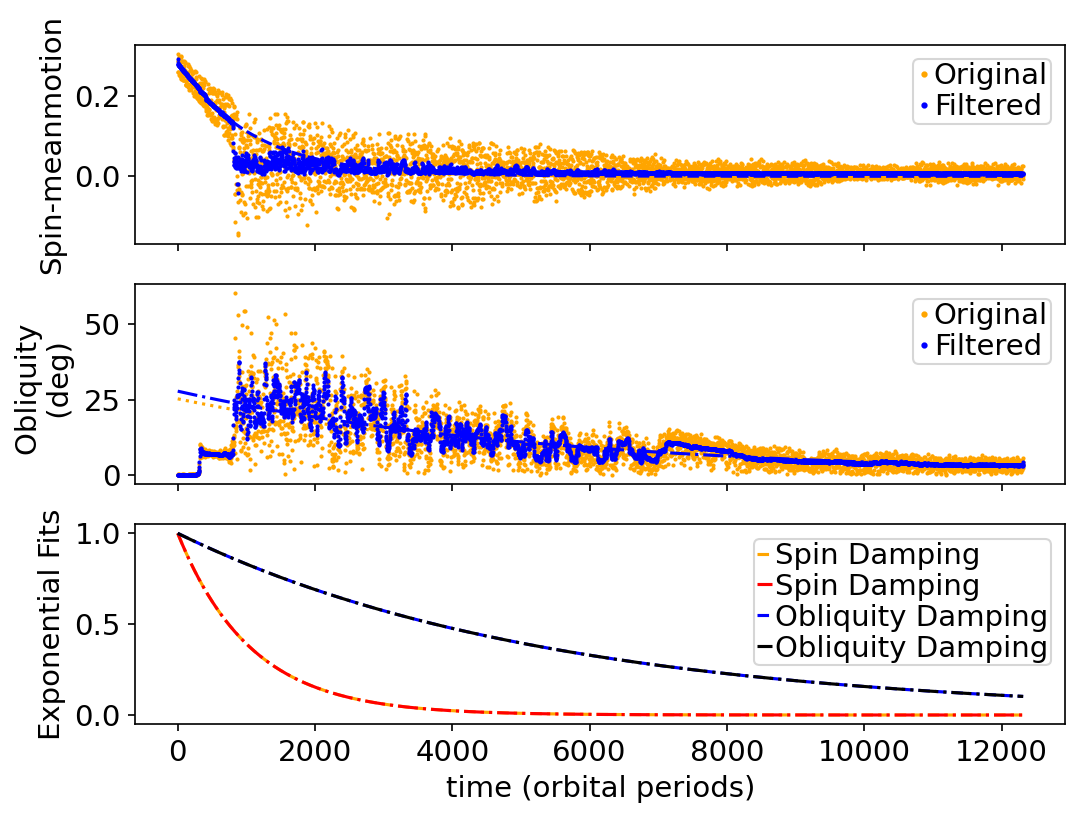

In [131]:
# plot some stuff
def mkplotdual_b(tarr,aaarr,eearr,iiarr,lnarr,ararr,maarr,om1,om2,\
        obliquity_deg1,obliquity_deg2,meanmotion,lib_angle,froot,dn,ofilename):
    # dn is to plot every other point
    nvpanels = 3
    f,axarr =  plt.subplots(nvpanels,1, dpi=150, figsize=(8,6), sharex= True)
    
#     plt.autoscale(enable=True, axis='x', tight=True)
#     plt.subplots_adjust(left=0.2, right=0.99, top=0.99, bottom=0.10, \
#         wspace=0.22, hspace=0.0)
    
    Porb_init = 2*np.pi/meanmotion[0]
    tarr /= Porb_init
    tlimit_spin = 2500
    tlimit_obliq = 2500
    ###########################
    il = 0;   # top
    smax = np.amax(om2)
    smin = np.amin(om2)
    
    
    om2_smo2 = savgol_filter(om2, 51, 2, mode='nearest')
    meanmotion_smo = savgol_filter(meanmotion, 51, 2, mode='nearest')
    
    m_spin_orig, b_spin_orig = np.polyfit(tarr[:tlimit_spin],np.log(np.abs(om2[:tlimit_spin]-meanmotion[:tlimit_spin])),1)
    m_spin, b_spin = np.polyfit(tarr[:tlimit_spin],np.log(np.abs(om2_smo2[:tlimit_spin]-meanmotion_smo[:tlimit_spin])),1)

    
    axarr[il].plot(tarr[::dn],om2[::dn]-meanmotion[::dn],'.',color='orange',ms=2,label='Original')
    axarr[il].plot(tarr[::dn],(np.exp(m_spin_orig*tarr + b_spin_orig))[::dn],'-.', color='orange')
    axarr[il].plot(tarr[::dn],om2_smo2[::dn]-meanmotion_smo[::dn],'.',color='blue', ms=2,label='Filtered')
    axarr[il].plot(tarr[::dn],(np.exp(m_spin*tarr + b_spin))[::dn],'--',color='blue')

#     axarr[il].plot(tarr[:tlimit_spin:dn],om2[:tlimit_spin:dn]-meanmotion[:tlimit_spin:dn],'.',color='orange',ms=2,label='Original')
#     axarr[il].plot(tarr[:tlimit_spin:dn],(np.exp(m_spin_orig*tarr + b_spin_orig))[:tlimit_spin:dn],'-.', color='orange')
#     axarr[il].plot(tarr[:tlimit_spin:dn],om2_smo2[:tlimit_spin:dn]-meanmotion_smo[:tlimit_spin:dn],'.',color='blue', ms=2,label='Filtered Original')
#     axarr[il].plot(tarr[:tlimit_spin:dn],(np.exp(m_spin*tarr + b_spin))[:tlimit_spin:dn],'--',color='blue')
    print(f'Spin Values: Original = {round(m_spin_orig,4)}t+ {round(b_spin_orig,4)}: SMO = {round(m_spin,4)}t + {round(b_spin,4)}')

    axarr[il].set_ylabel('Spin-meanmotion')
    axarr[il].legend(borderpad=0.1,labelspacing=0.1,handlelength=0.5,handletextpad=0.1,\
                    markerscale=2)
    
    ##########################
    il = 1;
#     il=
    obliquity_deg1_smo = savgol_filter(obliquity_deg1, 21, 2, mode='nearest')
    obliquity_deg2_smo = savgol_filter(obliquity_deg2, 101, 2, mode='nearest')
#     axarr[il].plot(tarr[::dn],obliquity_deg1_smo[::dn],'.',color='red',\
#                    ms=2,label='prim')
    m_obliq_orig, b_obliq_orig = np.polyfit(tarr[tlimit_obliq:], np.log(obliquity_deg2)[tlimit_obliq:], 1)
    m_obliq, b_obliq = np.polyfit(tarr[tlimit_obliq:], np.log(obliquity_deg2_smo)[tlimit_obliq:], 1)
    
    axarr[il].plot(tarr[::dn],obliquity_deg2[::dn],'.',color='orange', ms=2,label='Original')
    axarr[il].plot(tarr[::dn],(np.exp(m_obliq_orig*tarr + b_obliq_orig))[::dn],':', color='orange')
    axarr[il].plot(tarr[::dn],obliquity_deg2_smo[::dn],'.',color='blue', ms=2,label='Filtered')
    axarr[il].plot(tarr[::dn],(np.exp(m_obliq*tarr + b_obliq))[::dn],'-.', color='blue')
    
#     axarr[il].plot(tarr[tlimit_obliq::dn],obliquity_deg2[tlimit_obliq::dn],'.',color='orange', ms=2,label='Original')
#     axarr[il].plot(tarr[tlimit_obliq::dn],(np.exp(m_obliq_orig*tarr + b_obliq_orig))[tlimit_obliq::dn],':', color='orange')
#     axarr[il].plot(tarr[tlimit_obliq::dn],obliquity_deg2_smo[tlimit_obliq::dn],'.',color='blue', ms=2,label='Filtered Rot')
#     axarr[il].plot(tarr[tlimit_obliq::dn],(np.exp(m_obliq*tarr + b_obliq))[tlimit_obliq::dn],'-.', color='blue')
    print(f'Obliquity Values: Original = {round(m_obliq_orig,4)}t+ {round(b_obliq_orig,4)}: SMO = {round(m_obliq,4)}t + {round(b_obliq,4)}')

    
    axarr[il].set_ylabel('Obliquity \n (deg)')
    axarr[il].legend(borderpad=0.1,labelspacing=0.1,handlelength=0.5,handletextpad=0.1,\
                    markerscale=2)
    
    ##########################
    il = 2;
#     il=
    axarr[il].plot(tarr[::dn],np.exp(m_spin*tarr)[::dn],'--',color='orange', label = 'Spin Damping')
    axarr[il].plot(tarr[::dn],(np.exp(m_spin*tarr))[::dn],'-.',color='red', label = 'Spin Damping')

    axarr[il].plot(tarr[::dn],np.exp(m_obliq*tarr)[::dn],'--', color='blue', label = 'Obliquity Damping')
    axarr[il].plot(tarr[::dn],np.exp(m_obliq*tarr)[::dn],'-.', color='black', label = 'Obliquity Damping')
    print(f'Spin/Obliquity slope: {m_spin/m_obliq}')


    
    axarr[il].set_ylabel('Exponential Fits')
    axarr[il].legend(borderpad=0.1,labelspacing=0.1,handlelength=0.5,handletextpad=0.1,\
                    markerscale=2)
   



    il = nvpanels-1;
    axarr[il].set_xlabel('time (orbital periods)')
    if (len(ofilename)>3):
        plt.savefig(ofilename)
        
        
# read in orbital elements, spins for both resolved bodies
froot = 'b1'  # tides alone trying to let secondary tidally lock
tarr,aaarr,eearr,iiarr,lnarr,ararr,maarr,om1,om2,\
        obliquity_deg1,obliquity_deg2,meanmotion,lib_angle = read_two_bodies(simdir,froot,GM)

"""
2 plots -- one with spin (linear regression -- just as longa s that takes)
        -- one with obliquity (linear regression -- teh entire distance)

compare slopes of each s

"""
# make a plot!
ofilename='AJ_spin_comparision_b1.png'
mkplotdual_b(tarr,aaarr,eearr,iiarr,lnarr,ararr,maarr,om1,om2,\
        obliquity_deg1,obliquity_deg2,meanmotion,lib_angle,froot,10,ofilename)